In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from calendar import monthrange
import seaborn as sns
customers=pd.read_csv('olist_customers_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp','order_approved_at',
'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
items=pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [2]:
orders.sort_values('order_purchase_timestamp').head(330)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25
...,...,...,...,...,...,...,...,...
20049,b04bd4e0a1a21fef81b1f24f6fb81c08,bbf83aabda305a5ac059e05b342076a0,delivered,2016-10-10 18:05:54,2016-10-11 05:03:09,2016-10-15 05:03:18,2016-10-21 10:31:00,2016-11-30
23101,3d7d60b10ba4b43cf6f6d5df2e933f67,02cb3a8ef6e13d37560379559e2f533d,delivered,2016-10-10 18:09:39,2016-10-10 19:00:39,2016-10-30 14:57:59,2016-10-31 14:57:59,2016-11-30
53688,e5215415bb6f76fe3b7cb68103a0d1c0,b6f6cbfc126f1ae6723fe2f9b3751208,canceled,2016-10-22 08:25:27,NaT,NaT,NaT,2016-10-24
39761,bd50a7fe9fd97ea4b7663031a319e150,0975c3cf2e418ebfa5d1191a2dffd59d,delivered,2016-12-23 23:16:47,2016-12-23 23:31:37,2016-12-27 06:14:27,2016-12-28 15:54:44,2017-01-19


### Ознакомимся с данными.
Посмотрим, есть ли пропущенные значения или повторяющиеся строки в датафреймах.

In [3]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [4]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [5]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [6]:
customers[customers.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [7]:
orders[orders.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [8]:
items[items.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


Проверим типы данных. Колонки с временным типом считаем в правильном формате с помощью parse_dates.

In [9]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [10]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [11]:
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

### Что считать покупкой?
Было два возможных определения покупки:   
1) дата подтверждения оплаты заказа (order_approved_at) присутствует;  
2) статус заказа - delivered.

In [12]:
orders[orders.order_status=="delivered"].isnull().sum() #Есть заказы с отсутствующей датой доставки,их тоже учтём

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [13]:
orders[orders.order_approved_at.notnull()].groupby('order_status', as_index=False).agg({'order_id':'count'})

,order_status,order_id
0,approved,2
1,canceled,484
2,delivered,96464
3,invoiced,314
4,processing,301
5,shipped,1107
6,unavailable,609


Если смотреть по order_approved_at, то встречаются заказы, которые явно не достигли своего покупателя.  
Так что лучше ориентироваться на **заказы со статусом delivered**

### №1. Сколько пользователей совершили только одну покупку?

In [14]:
customers_and_orders=customers.merge(orders,on='customer_id')
customers_and_orders[customers_and_orders.order_status=='delivered'].isna().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [15]:
one_purchase_only=customers_and_orders.query('order_status=="delivered"')\
.groupby('customer_unique_id', as_index=False)\
.agg({'order_id':'count'})\
.query('order_id==1')

In [16]:
one_purchase_only.shape[0] #ответ на первый вопрос

90557

### №2. Сколько заказов в месяц не доставляется по разным причинам?

Две возможные причины: заказ либо отменен, либо недоступен

In [17]:
undelivered=orders[(orders.order_status=='canceled')|(orders.order_status=='unavailable')]\
.sort_values(by='order_purchase_timestamp') #Получили датафрейм только с недоставленными заказами

Получим колонку, содержащую каждый месяц каждого года, затем сгруппируем данные по причине и посчитаем, сколько заказов в каждый месяц каждого года не было доставлено 

In [18]:
undelivered['year_month']=undelivered.order_purchase_timestamp.dt.strftime("%Y-%m")

In [19]:
undelivered_by_month=undelivered.groupby(['year_month', 'order_status'],as_index=False)\
.agg({'order_id':'count'})\
.pivot(columns='order_status', index='year_month', values='order_id').\
rename({'order_id':'number_of_orders'}).fillna(0)

In [20]:
undelivered_by_month

order_status,canceled,unavailable
year_month,,
2016-09,2.0,0.0
2016-10,24.0,7.0
2017-01,3.0,10.0
2017-02,17.0,45.0
2017-03,33.0,32.0
2017-04,18.0,9.0
2017-05,29.0,31.0
2017-06,16.0,24.0
2017-07,28.0,52.0


In [21]:
round(undelivered_by_month.canceled.mean(),2) #Среднее количество отмененных заказов в месяц

26.04

In [22]:
round(undelivered_by_month.unavailable.mean(),2) #Среднее количество недоступных заказов в месяц

25.38

### №3. В какой день недели чаще покупается каждый товар?

Будем считать датой покупки дату оформления заказа. 
1. Необходимо объединить таблицу товаров и таблицу заказов.
2. Оставим только те заказы, которые превратились в покупку (статус = delivered).
3. Создадим столбец с днями недели, полученный округлением даты оформления заказа.

In [23]:
#Посмотрим, сколько уникальных товаров
items.product_id.nunique()

32951

In [24]:
#Посмотрим, могут ли разные товары встречаться в составе одного заказа
items.order_item_id.unique() # Посмотрим, сколько позиций может быть в чеке
items[items.order_item_id==21] #Посмотрим номер заказа с самым "длинным" чеком
items[items.order_id=='8272b63d03f5f79c56e9e4120aec44ef'].product_id.nunique()#Да, тут встречаются 3 разных товара

3

In [25]:
orders_and_items=orders.merge(items, on='order_id')

In [26]:
orders_and_items=orders_and_items.query('order_status == "delivered"') #Берём только записи, содержащие инф-ию о покупках

In [27]:
orders_and_items=orders_and_items[['order_id', 'order_purchase_timestamp', 'order_item_id','product_id']]
#Сократим количество столбцов

In [28]:
orders_and_items['weekdays']=orders_and_items['order_purchase_timestamp'].dt.weekday 
#Получим столбец с днями недели

In [29]:
orders_and_items

,order_id,order_purchase_timestamp,order_item_id,product_id,weekdays
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,1
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,2
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,5
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,1
...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1
112646,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,1,b80910977a37536adeddd63663f916ad,6
112647,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,1,d1c427060a0f73f6b889a5c7c61f2ac4,0
112648,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2,d1c427060a0f73f6b889a5c7c61f2ac4,0


In [30]:
weekdays_and_products=orders_and_items.groupby(['product_id', 'weekdays'],as_index=False)\
.agg({'order_id':'nunique'})\
.sort_values(by=['product_id','order_id'], ascending=False)
weekdays_and_products #Группируем по id товара и дням недели, чтобы посчитать количество покупок в разные дни

,product_id,weekdays,order_id
59952,fffe9eeff12fcbd74a2f2b007dde0c58,2,1
59948,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2
59949,fffdb2d0ec8d6a61f0a0a0db3f25b441,3,1
59950,fffdb2d0ec8d6a61f0a0a0db3f25b441,4,1
59951,fffdb2d0ec8d6a61f0a0a0db3f25b441,6,1
...,...,...,...
3,000b8f95fcb9e0096488278317764d19,2,1
4,000b8f95fcb9e0096488278317764d19,4,1
2,0009406fd7479715e4bef61dd91f2462,3,1
1,00088930e925c41fd95ebfe695fd2655,1,1


In [31]:
products_and_ids=weekdays_and_products.groupby('product_id', as_index=False).agg(list)
#Собираем данные о днях и количестве покупок в список, чтобы определить
#для каждого товара максимальный элемент в списке с количеством покупок

In [32]:
products_and_ids['max_number_of_products']=products_and_ids.order_id.apply(lambda x: max(x))
#Колонка с максимальным количеством покупок для каждого товара

In [33]:
products_and_ids

,product_id,weekdays,order_id,max_number_of_products
0,00066f42aeeb9f3007548bb9d3f33c38,[6],[1],1
1,00088930e925c41fd95ebfe695fd2655,[1],[1],1
2,0009406fd7479715e4bef61dd91f2462,[3],[1],1
3,000b8f95fcb9e0096488278317764d19,"[2, 4]","[1, 1]",1
4,000d9be29b5207b54e86aa1b1ac54872,[1],[1],1
...,...,...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,"[5, 6]","[1, 1]",1
32212,fff81cc3158d2725c0655ab9ba0f712c,[0],[1],1
32213,fff9553ac224cec9d15d49f5a263411f,[4],[1],1
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,"[1, 3, 4, 6]","[2, 1, 1, 1]",2


Теперь мы объединим таблицы, чтобы отфильтровать итоговую таблицу по условию:  
количество купленного товара в определенный день недели максимально

In [34]:
merged=weekdays_and_products.merge(products_and_ids,on='product_id')
merged.head(20)

,product_id,weekdays_x,order_id_x,weekdays_y,order_id_y,max_number_of_products
0,fffe9eeff12fcbd74a2f2b007dde0c58,2,1,[2],[1],1
1,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2,"[1, 3, 4, 6]","[2, 1, 1, 1]",2
2,fffdb2d0ec8d6a61f0a0a0db3f25b441,3,1,"[1, 3, 4, 6]","[2, 1, 1, 1]",2
3,fffdb2d0ec8d6a61f0a0a0db3f25b441,4,1,"[1, 3, 4, 6]","[2, 1, 1, 1]",2
4,fffdb2d0ec8d6a61f0a0a0db3f25b441,6,1,"[1, 3, 4, 6]","[2, 1, 1, 1]",2
5,fff9553ac224cec9d15d49f5a263411f,4,1,[4],[1],1
6,fff81cc3158d2725c0655ab9ba0f712c,0,1,[0],[1],1
7,fff6177642830a9a94a0f2cba5e476d1,5,1,"[5, 6]","[1, 1]",1
8,fff6177642830a9a94a0f2cba5e476d1,6,1,"[5, 6]","[1, 1]",1
9,fff515ea94dbf35d54d256b3e39f0fea,6,1,[6],[1],1


In [35]:
merged=merged[merged.order_id_x==merged.max_number_of_products] #Фильтрация

In [36]:
merged.head(7)

,product_id,weekdays_x,order_id_x,weekdays_y,order_id_y,max_number_of_products
0,fffe9eeff12fcbd74a2f2b007dde0c58,2,1,[2],[1],1
1,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2,"[1, 3, 4, 6]","[2, 1, 1, 1]",2
5,fff9553ac224cec9d15d49f5a263411f,4,1,[4],[1],1
6,fff81cc3158d2725c0655ab9ba0f712c,0,1,[0],[1],1
7,fff6177642830a9a94a0f2cba5e476d1,5,1,"[5, 6]","[1, 1]",1
8,fff6177642830a9a94a0f2cba5e476d1,6,1,"[5, 6]","[1, 1]",1
9,fff515ea94dbf35d54d256b3e39f0fea,6,1,[6],[1],1


In [37]:
final=merged.groupby('product_id')['weekdays_x'].apply(list).reset_index(name='popular_weekdays')
# Для каждого товара получим список популярных для него дней недели

In [38]:
final.head() #Final - таблица-ответ на задание №3

,product_id,popular_weekdays
0,00066f42aeeb9f3007548bb9d3f33c38,[6]
1,00088930e925c41fd95ebfe695fd2655,[1]
2,0009406fd7479715e4bef61dd91f2462,[3]
3,000b8f95fcb9e0096488278317764d19,"[2, 4]"
4,000d9be29b5207b54e86aa1b1ac54872,[1]


### №4. Сколько у пользователей в среднем покупок за неделю (по месяцам)?

1. Покупка, как обычно, означает, что статус = delivered
2. Для каждого месяца каждого года получим количество недель 

In [39]:
customers_and_orders=customers_and_orders[customers_and_orders.order_status=='delivered'] #Взяли только данные по покупкам
customers_and_orders['year_and_month']=customers_and_orders\
.order_purchase_timestamp.dt.strftime("%Y-%m").str.split('-')
# Получили список, содержащий год и месяц каждой покупки
customers_and_orders['year_and_month']=customers_and_orders['year_and_month'].apply(lambda x: [int(i) for i in x])
#Приведение элементов списка к целочисленному типу необходимо для работы функции monthrange
customers_and_orders['weeks']=customers_and_orders.year_and_month\
.apply(lambda x: round((monthrange(x[0],x[1])[1])/7, 2)) #Нашли число дней и поделили на 7
customers_and_orders.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_and_month,weeks
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,"[2017, 5]",4.43
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,"[2018, 1]",4.43
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,"[2018, 5]",4.43
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,"[2018, 3]",4.43
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,"[2018, 7]",4.43
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,"[2017, 9]",4.29
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,"[2018, 2]",4.00
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,"[2017, 11]",4.29
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20,"[2018, 1]",4.43
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,2018-01-13 14:51:55,2018-02-05,"[2018, 1]",4.43


In [40]:
customers_and_orders=customers_and_orders.sort_values(by='order_purchase_timestamp')
customers_and_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_and_month,weeks
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,"[2016, 9]",4.29
38634,355077684019f7f60a031656bd7262b8,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,3b697a20d9e427646d92567910af6d57,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,"[2016, 10]",4.43
55191,7ec40b22510fdbea1b08921dd39e63d8,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,be5bc2f0da14d8071e2d45451ad119d9,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,"[2016, 10]",4.43
7739,6f989332712d3222b6571b1cf5b835ce,61db744d2f835035a5625b59350c6b63,90040,porto alegre,RS,a41c8759fbe7aab36ea07e038b2d4465,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,"[2016, 10]",4.43
56215,b8cf418e97ae795672d326288dfab7a7,8d3a54507421dbd2ce0a1d58046826e0,13185,hortolandia,SP,d207cc272675637bfed0062edffd0818,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,"[2016, 10]",4.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62462,e450a297a7bc6839ceb0cf1a2377fa02,7a22d14aa3c3599238509ddca4b93b01,5863,sao paulo,SP,52018484704db3661b98ce838612b507,delivered,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03,"[2018, 8]",4.43
84603,e60df9449653a95af4549bbfcb18a6eb,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,"[2018, 8]",4.43
495,6e353700bc7bcdf6ebc15d6de16d7002,7febafa06d9d8f232a900a2937f04338,38600,paracatu,MG,168626408cb32af0ffaf76711caae1dc,delivered,2018-08-29 14:18:28,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,"[2018, 8]",4.43
49885,496630b6740bcca28fce9ba50d8a26ef,b701bebbdf478f5500348f03aff62121,9541,sao caetano do sul,SP,03ef5dedbe7492bdae72eec50764c43f,delivered,2018-08-29 14:52:00,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,"[2018, 8]",4.43


Для анализа не хватает данных за сентябрь 2016 и за август 2018 годов.  
Лучше убрать первую и последнюю строку, иначе получится так, что в этих месяцах было очень мало покупок.

In [41]:
customers_and_orders=customers_and_orders.drop(index=[21125, 67281])
customers_and_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_and_month,weeks
38634,355077684019f7f60a031656bd7262b8,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,3b697a20d9e427646d92567910af6d57,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,"[2016, 10]",4.43
55191,7ec40b22510fdbea1b08921dd39e63d8,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,be5bc2f0da14d8071e2d45451ad119d9,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,"[2016, 10]",4.43
7739,6f989332712d3222b6571b1cf5b835ce,61db744d2f835035a5625b59350c6b63,90040,porto alegre,RS,a41c8759fbe7aab36ea07e038b2d4465,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,"[2016, 10]",4.43
56215,b8cf418e97ae795672d326288dfab7a7,8d3a54507421dbd2ce0a1d58046826e0,13185,hortolandia,SP,d207cc272675637bfed0062edffd0818,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,"[2016, 10]",4.43
19876,7812fcebfc5e8065d31e1bb5f0017dae,87776adb449c551e74c13fc34f036105,12030,taubate,SP,cd3b8574c82b42fc8129f6d502690c3e,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,2016-10-08 10:34:01,2016-10-14 16:08:00,2016-11-23,"[2016, 10]",4.43


In [42]:
customers_and_orders['year_and_month']=customers_and_orders\
.order_purchase_timestamp.dt.strftime("%Y-%m") 
#Опять преобразовали значение колонки year_and_month в формат "год-месяц", чтобы не было ошибок в группировке
orders_per_week=customers_and_orders.groupby(['customer_unique_id','year_and_month', 'weeks'],as_index=False)\
.agg({'order_id':'count'})\
.sort_values(by='order_id') #Получим датафрейм с количеством заказов за каждый месяц для каждого пользователя

In [43]:
orders_per_week['orders_per_week']=round(orders_per_week['order_id']/orders_per_week['weeks'],2)

In [44]:
orders_per_week=orders_per_week[['customer_unique_id','year_and_month', 'orders_per_week']]
orders_per_week.head(20) #Таблица orders_per_week - ответ к заданию №4

,customer_unique_id,year_and_month,orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.23
63266,a9ee2be8e606aa8c7bf7bfac9feb68eb,2018-05,0.23
63265,a9ee0ffb5493291751591e53992b1349,2017-12,0.23
63264,a9ede3b663d9ee53aa06865d90182af2,2018-04,0.23
63263,a9ed06e13fc37cc915f5ecb904fbe34d,2018-02,0.25
63262,a9ebb66932edcfc2de4b6b50111992fd,2018-02,0.25
63261,a9eb99ccaa59fb6f67bdbb1ec6ca45e1,2017-09,0.23
63260,a9eb3e328b058c6952fb61c794c112e8,2017-12,0.23
63259,a9e91020f6114cdec2a30386c314a737,2018-04,0.23
63258,a9e8a8258cc9ace2554030c55c1da9a6,2018-04,0.23


### №5. Когортный анализ пользователей

1. Целевое действие - покупка.
2. Критерий отнесения пользователя к когорте - дата первой покупки (order_purchase_timestamp). Нужно добавить эту колонку.
3. Нужно посмотреть, сколько пользователей, купивших у нас в первый раз, продолжают покупать по месяцам, следующим за первым.

In [45]:
customers_and_orders=customers.merge(orders,on='customer_id')
customers_and_orders['year_and_month']=pd.to_datetime(customers_and_orders\
.order_purchase_timestamp.dt.strftime("%Y-%m"))
customers_and_orders=customers_and_orders[customers_and_orders.order_status=='delivered'] #Берём только покупки
customers_and_orders=customers_and_orders[['customer_unique_id', 'year_and_month']] #Оставим нужные столбцы

In [46]:
customers_and_orders=customers_and_orders.sort_values(by=['customer_unique_id', 'year_and_month'])
customers_and_orders #Таблица, содержащая данные о всех месяцах покупок для всех пользователей

,customer_unique_id,year_and_month
64012,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
24570,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
40832,0000f46a3911fa3c0805444483337064,2017-03-01
57118,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
81150,0004aac84e0df4da2b147fca70cf8255,2017-11-01
...,...,...
89147,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
9810,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
69017,ffff371b4d645b6ecea244b27531430a,2017-02-01
94891,ffff5962728ec6157033ef9805bacc48,2018-05-01


In [47]:
first_purchase=customers_and_orders.groupby('customer_unique_id', as_index=False)\
.agg({'year_and_month':'min'})\
.rename(columns={'year_and_month':'first_purchase_date'})# Взяли самую первую дату - дату первой покупки

In [48]:
first_purchase #Таблица, содержащая дату первой покупки для каждого пользователя

,customer_unique_id,first_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
93355,ffff371b4d645b6ecea244b27531430a,2017-02-01
93356,ffff5962728ec6157033ef9805bacc48,2018-05-01


In [49]:
cohort=customers_and_orders.merge(first_purchase, on='customer_unique_id')
cohort #Собрали таблицу с датами покупок и датой первой покупки для каждого пользователя

,customer_unique_id,year_and_month,first_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,2017-11-01
...,...,...,...
96473,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,2017-06-01
96474,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,2017-12-01
96475,ffff371b4d645b6ecea244b27531430a,2017-02-01,2017-02-01
96476,ffff5962728ec6157033ef9805bacc48,2018-05-01,2018-05-01


In [50]:
cohort=cohort.groupby(['year_and_month', 'first_purchase_date'], as_index=False)\
.agg({'customer_unique_id':'nunique'})
#Посчитали, сколько пользователей купили впервые в какой-то месяц и сколько из них продолжали покупать в следующие месяцы

In [51]:
cohort

,year_and_month,first_purchase_date,customer_unique_id
0,2016-09-01,2016-09-01,1
1,2016-10-01,2016-10-01,262
2,2016-12-01,2016-12-01,1
3,2017-01-01,2016-12-01,1
4,2017-01-01,2017-01-01,717
...,...,...,...
214,2018-08-01,2018-04-01,9
215,2018-08-01,2018-05-01,12
216,2018-08-01,2018-06-01,16
217,2018-08-01,2018-07-01,31


In [182]:
import numpy as np
import math
cohort['period']=round(((cohort['year_and_month']-cohort['first_purchase_date'])/np.timedelta64(1, 'M')),0).astype(int)
cohort=cohort.sort_values(by=['first_purchase_date', 'year_and_month']) 
# Для построения таблицы нужно получить месяцы, следующие за месяцем первой покупки. Разница между датой первой покупки
# и текущей датой в месяцах определяется как период, за который мы смотрим retention

In [184]:
cohort.head()

,year_and_month,first_purchase_date,customer_unique_id,period
0,2016-09-01,2016-09-01,1,0
1,2016-10-01,2016-10-01,262,0
10,2017-04-01,2016-10-01,1,6
26,2017-07-01,2016-10-01,1,9
42,2017-09-01,2016-10-01,1,11


In [185]:
table=cohort.pivot_table(columns='period', index='first_purchase_date', values='customer_unique_id', aggfunc='sum')
table # Собрали прообраз ответа

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_purchase_date,,,,,,,,,,,,,,,,,,,,
2016-09-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,717.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02-01,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
2017-03-01,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN,NaN
2017-04-01,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05-01,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN,NaN
2017-06-01,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN


In [186]:
# Теперь получим значения в ячейках в процентах, а значения за первый месяц превратим в 100 процентов
for x in range(22):
    for y in range(1,20):
        table.iloc[x,y]=round(table.iloc[x,y]/table.iloc[x,0]*100,2)
for x in range(22):
    table.iloc[x,0]=100

In [187]:
table=table.fillna(0) # Заменили для удобства восприятия NaN нулями

In [188]:
table

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_purchase_date,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-10-01,100.0,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.38,0.00,0.38,0.00,0.38,0.00,0.38,0.00,0.38,0.76,0.76
2016-12-01,100.0,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-01-01,100.0,0.28,0.28,0.14,0.42,0.14,0.42,0.14,0.14,0.00,0.42,0.14,0.70,0.42,0.14,0.14,0.28,0.42,0.14,0.00
2017-02-01,100.0,0.18,0.31,0.12,0.43,0.12,0.25,0.18,0.12,0.18,0.12,0.31,0.12,0.18,0.12,0.06,0.06,0.18,0.00,0.00
2017-03-01,100.0,0.44,0.36,0.40,0.36,0.16,0.16,0.32,0.32,0.08,0.36,0.12,0.20,0.12,0.16,0.24,0.08,0.12,0.00,0.00
2017-04-01,100.0,0.62,0.22,0.18,0.27,0.27,0.35,0.31,0.31,0.18,0.27,0.09,0.04,0.04,0.09,0.09,0.13,0.00,0.00,0.00
2017-05-01,100.0,0.46,0.46,0.29,0.29,0.32,0.41,0.14,0.26,0.26,0.26,0.35,0.23,0.03,0.17,0.20,0.00,0.00,0.00,0.00
2017-06-01,100.0,0.49,0.40,0.43,0.30,0.40,0.36,0.23,0.13,0.20,0.30,0.36,0.16,0.16,0.23,0.00,0.00,0.00,0.00,0.00


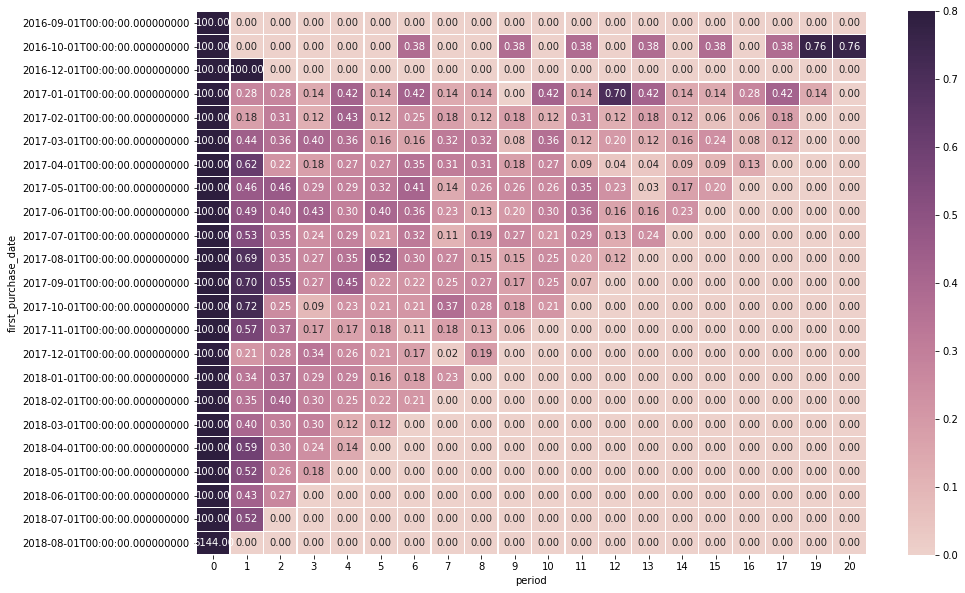

In [189]:
# Строим тепловую карту. 
# Чтобы цвета отличались, укажем максимальное значение равным 0.8, иначе всё сливается.
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(table, annot=True, fmt=".2f", vmax=0.8, linewidths= .3, cmap=sns.cubehelix_palette(as_cmap=True))

Значения очень маленькие! Доказательство того, что почти все пользователи сделали только одну покупку.  
По тепловой карте видно, что на третий месяц (3) retention выше всего у когорты 2017-06 (0.43 %)

### №6. RFM-сегментация пользователей

1. По аналогии с предыдущим заданием, покупка - статус "delivered"
2. Пусть текущим моментом,с которым мы сравниваем, будет самая последняя дата датафрейма плюс один день

In [59]:
customers_and_orders=customers.merge(orders,on='customer_id')
customers_and_orders=customers_and_orders[customers_and_orders['order_status']=='delivered']
customers_and_orders=customers_and_orders[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]
customers_and_orders # Отобрали данные только с покупками и выкинули лишние столбцы

,customer_unique_id,order_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30
...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17
99437,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22
99438,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50
99439,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33


In [60]:
money=items.groupby('order_id', as_index='False').agg({'price':'sum'}) #Посчитаем сумму каждого заказа

In [61]:
last_date=customers_and_orders.groupby('customer_unique_id', as_index=False)\
.agg({'order_purchase_timestamp':'max'})\
.rename(columns={'order_purchase_timestamp':'last_purchase_date'}) #Получим отдельный датасет с датой последней покупки 

In [62]:
merged_1=customers_and_orders.merge(last_date, on='customer_unique_id')
merged_1 #Осталось присоединить информацию о деньгах

,customer_unique_id,order_id,order_purchase_timestamp,last_purchase_date
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29 09:51:30
...,...,...,...,...
96473,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,2018-04-07 15:48:17
96474,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,2018-04-04 08:20:22
96475,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,2018-04-08 20:11:50
96476,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,2017-11-03 21:08:33


In [63]:
merged_2=merged_1.merge(money, on='order_id').rename(columns={'price':'money'})
merged_2

,customer_unique_id,order_id,order_purchase_timestamp,last_purchase_date,money
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07-29 09:51:30,230.00
...,...,...,...,...,...
96473,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,2018-04-07 15:48:17,74.90
96474,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,2018-04-04 08:20:22,114.90
96475,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,2018-04-08 20:11:50,37.00
96476,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,2017-11-03 21:08:33,689.00


In [64]:
merged_2['R'] = (pd.Timestamp('2018-10-18')-merged_2['last_purchase_date']).dt.days 
# Нашли разницу между текущей датой и датой последней покупки

In [65]:
merged_2.drop('order_purchase_timestamp', axis= 1 , inplace= True ) # Он не понадобится

In [66]:
merged_2=merged_2.groupby(['customer_unique_id', 'last_purchase_date', 'R'], as_index=False)\
.agg({'order_id':'nunique', 'money':'sum'})\
.rename(columns={'order_id':'F', 'money':'M'})
# Получили количество всех покупок и сумму всех покупок для каждого пользователя

In [67]:
#Посмотрим, в каких пределах лежат суммы денег
merged_2['M'].max()

13440.0

In [68]:
merged_2['M'].min()

0.85

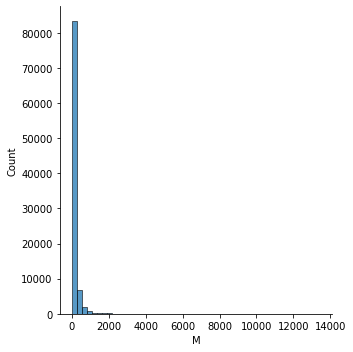

In [94]:
sns.displot(merged_2.M, bins=50) 

In [75]:
#Посмотрим на пределы по дням, прошедшим с момента последней покупки
merged_2['R'].max()

762

In [76]:
merged_2['R'].min()

49

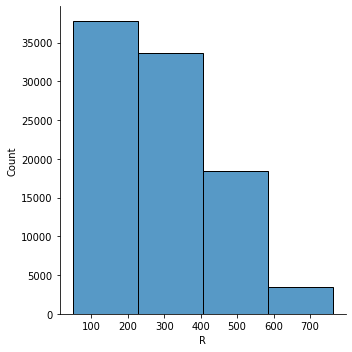

In [96]:
sns.displot(merged_2.R, bins=4)

(0.0, 4.0)

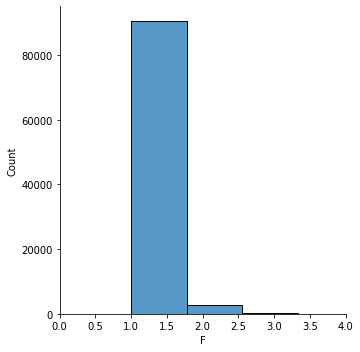

In [78]:
#Посмотрим, сколько заказов сделали пользователи
sns.displot(merged_2.F)
plt.xlim([0, 4])
#Почти все пользователи сделали только один заказ

In [79]:
merged_2['F'].max()

15

In [80]:
merged_2['F'].min()

1

Определяем границы метрик. Пусть у нас будет три градации: от 1 - пользователи в зоне риска (мало приносят денег, мало покупают или давно у нас не были) до 3 (приносят больше всех денег, много покупают или часто бывают).

Поскольку почти все пользователи совершили только одну покупку, разумно было бы поделить их на тех, кто купил один раз, и всех остальных. Но по гистограмме (выше) видно, что второй по объему кластер - люди, купившие дважды, так что выделим и его.
1. Пусть по количеству покупок у нас будут:   
1 - пользователи, совершившие одну покупку;  
2 - пользователи, совершившие две покупки;  
3 - пользователи, совершившие более двух покупок.   

Для определения границ метрики Monetary будем использовать квартили.

In [ ]:
1 - сумма покупок до 25% (до 47.65)

In [82]:
quantiles=merged_2.quantile(q=[0.25,0.5,0.75])
quantiles

,R,F,M
0.25,163.0,1.0,47.6500
0.50,267.0,1.0,89.7300
0.75,395.0,1.0,154.7375


Установим следующие границы для метрики Monetary:  
1 - сумма покупок до 25% (до 47.65);  
2 - сумма покупок от 25% до 75% (от 47.65 до 154.7375);  
3 - сумма покупок выше 75% (от 154.7375).

Для метрики Recency установим другие границы. Разумнее рассматривать давность последней покупки в единицах года. Поэтому возьмём год и поделим его на три части.  
1 - покупали в последний раз более чем 242 дня назад;    
2 - покупали в последний раз от 121 до 242 дней назад;   
3 - покупали в последний раз не более 121 дня назад.

In [97]:
#Начинаем присваивать пользователям ранги по каждой из трёх метрик
def f_sort(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3
def r_sort(x):
    if x>242:
        return 1
    elif x<=242 and x>=121:
        return 2
    else:
        return 3
def m_sort(x):
    if x<47.6500:
        return 1
    elif x>=47.6500 and x<=154.7375:
        return 2
    else:
        return 3

In [98]:
merged_2['R'] = merged_2['R'].apply(lambda x: r_sort(x))
merged_2['F'] = merged_2['F'].apply(lambda x: f_sort(x))
merged_2['M'] = merged_2['M'].apply(lambda x: m_sort(x))

In [99]:
merged_2

,customer_unique_id,last_purchase_date,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2,1,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2,1,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,1,3
...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1,1,3
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,1,2
93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,1,2
93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2,1,2


In [100]:
#Сделаем столбец сочетаний r, f, m
merged_2['RFM'] = merged_2['R'].map(str) + merged_2['F'].map(str) + merged_2['M'].map(str)

In [101]:
merged_2

,customer_unique_id,last_purchase_date,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2,1,2,212
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2,1,1,211
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,1,3,113
...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1,1,3,113
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,1,2,112
93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,1,2,112
93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2,1,2,212


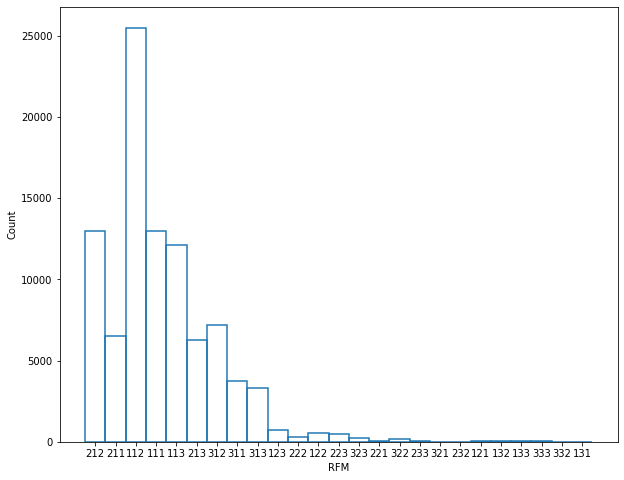

In [138]:
#Посмотрим на распределение сегментов
plt.figure(figsize=(10,8))
sns.histplot(merged_2, x='RFM', fill=False)

In [144]:
merged_2.groupby('RFM', as_index=False).agg({'customer_unique_id':'nunique'})\
.sort_values(by='customer_unique_id', ascending=False)

,RFM,customer_unique_id
1,112,25496
10,212,12983
0,111,12959
2,113,12105
18,312,7212
9,211,6498
11,213,6237
17,311,3748
19,313,3319
5,123,754


Как видим, больше всего пользователей совершили более 242 дней назад одну покупку на среднюю сумму, а меньше всего тех пользователей, которые давно совершили более двух покупок на маленькую сумму в общей сложности.

Всего 3х3х3=27 сегментов. Объединим их в несколько групп и дадим им названия.

In [109]:
description_map = {
    r'1[1-2][1-3]': 'безнадежные', # Покупали давно 1-2 раза
    r'1[3][1-3]': 'хорошо бы вернуть', # Покупали давно, но часто (почти безнадёжны)
    r'31[1-3]': 'новички', # Недавно купили первый товар
    r'2[1-3][1-3]': 'нуждаются в поощрении', # Относительно давно не были, но покупали на большую сумму
    r'32[1-3]': 'почти лояльные клиенты', # Покупали недавно пару раз
    r'33[1-2]': 'лояльные клиенты', # Покупали недавно и много, но не очень дорогие товары   
    r'333': 'любимые клиенты'# Покупали недавно, много и на большую сумму
}

merged_2['Group'] =  merged_2['RFM'].replace(description_map, regex=True)
merged_2.head()

,customer_unique_id,last_purchase_date,R,F,M,RFM,Group
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2,1,2,212,нуждаются в поощрении
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2,1,1,211,нуждаются в поощрении
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,1,2,112,безнадежные
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,1,1,111,безнадежные
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,1,3,113,безнадежные


In [134]:
rfm_graph=merged_2.groupby('Group', as_index=False)\
.agg({'customer_unique_id':'count'})\
.rename(columns={'customer_unique_id':'number_of_clients'})\
.sort_values(by='number_of_clients', ascending=False)
rfm_graph

,Group,number_of_clients
0,безнадежные,51910
4,нуждаются в поощрении,26587
3,новички,14279
5,почти лояльные клиенты,439
6,хорошо бы вернуть,99
2,любимые клиенты,37
1,лояльные клиенты,7


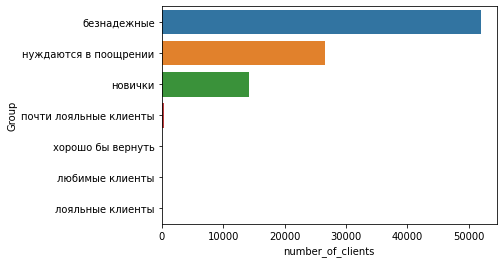

In [135]:
sns.barplot(x='number_of_clients', y='Group', data=rfm_graph)

Как видим, очень много "безнадежных" клиентов. Клиентов сегмента "нуждаются в поощрении" следует привлечь выгодным предложением или акцией, чтобы они почаще приходили и перекочевали в сегмент "лояльных". То же самое следует сделать в отношении "новичков", поскольку их очень много: задобрить их персональной скидкой, подарить бонусы за первую покупку.

In [153]:
np.arange(4)

array([0, 1, 2, 3])